In [12]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import math

In [22]:
#calculate psnr
def calPSNR(imgf1,imgf2):
    temp = imgf1-imgf2
    mse=0
    for i in range(3000000):
        mse+=abs(temp[i])**2
    mse=mse/3000000
    psnr=10*math.log(pow(255,2)/mse)
    return psnr

In [2]:
#load img
img = Image.open("data/Histogram Equalization/1.jpg")
img_size=np.array(img).shape
img_m=np.array(img)

In [18]:
#try the histogram euqlization function from outside lib
img_1= ImageOps.equalize(img)

In [3]:
#gain the probability distribution
mf=img_m.flatten()
m_statics=np.zeros((256,1))
for num in mf:
    m_statics[num]=m_statics[num]+1
m_statics=m_statics/3000000

In [4]:
#generate the map
map=np.zeros((256,1))
p_sum=0
map[255]=255
for i in range(255):
    p_sum+=m_statics[i]
    map[i]=((int)(p_sum*256))

In [5]:
#use the map transfering img to ans
ans_m=np.zeros(img_size)
for i in range(img_size[0]):
    for j in range(img_size[1]):
        ans_m[i][j]=map[img_m[i][j]]
ans_m=ans_m.reshape(2000,1500)

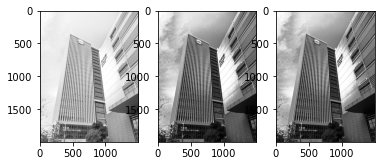

In [26]:
#show images 
plt.figure()
plt.subplot(131)
plt.imshow(img, cmap ='gray')
plt.subplot(132)
plt.imshow(ans_m, cmap ='gray')
plt.subplot(133)
plt.imshow(img_1, cmap ='gray')
plt.show()

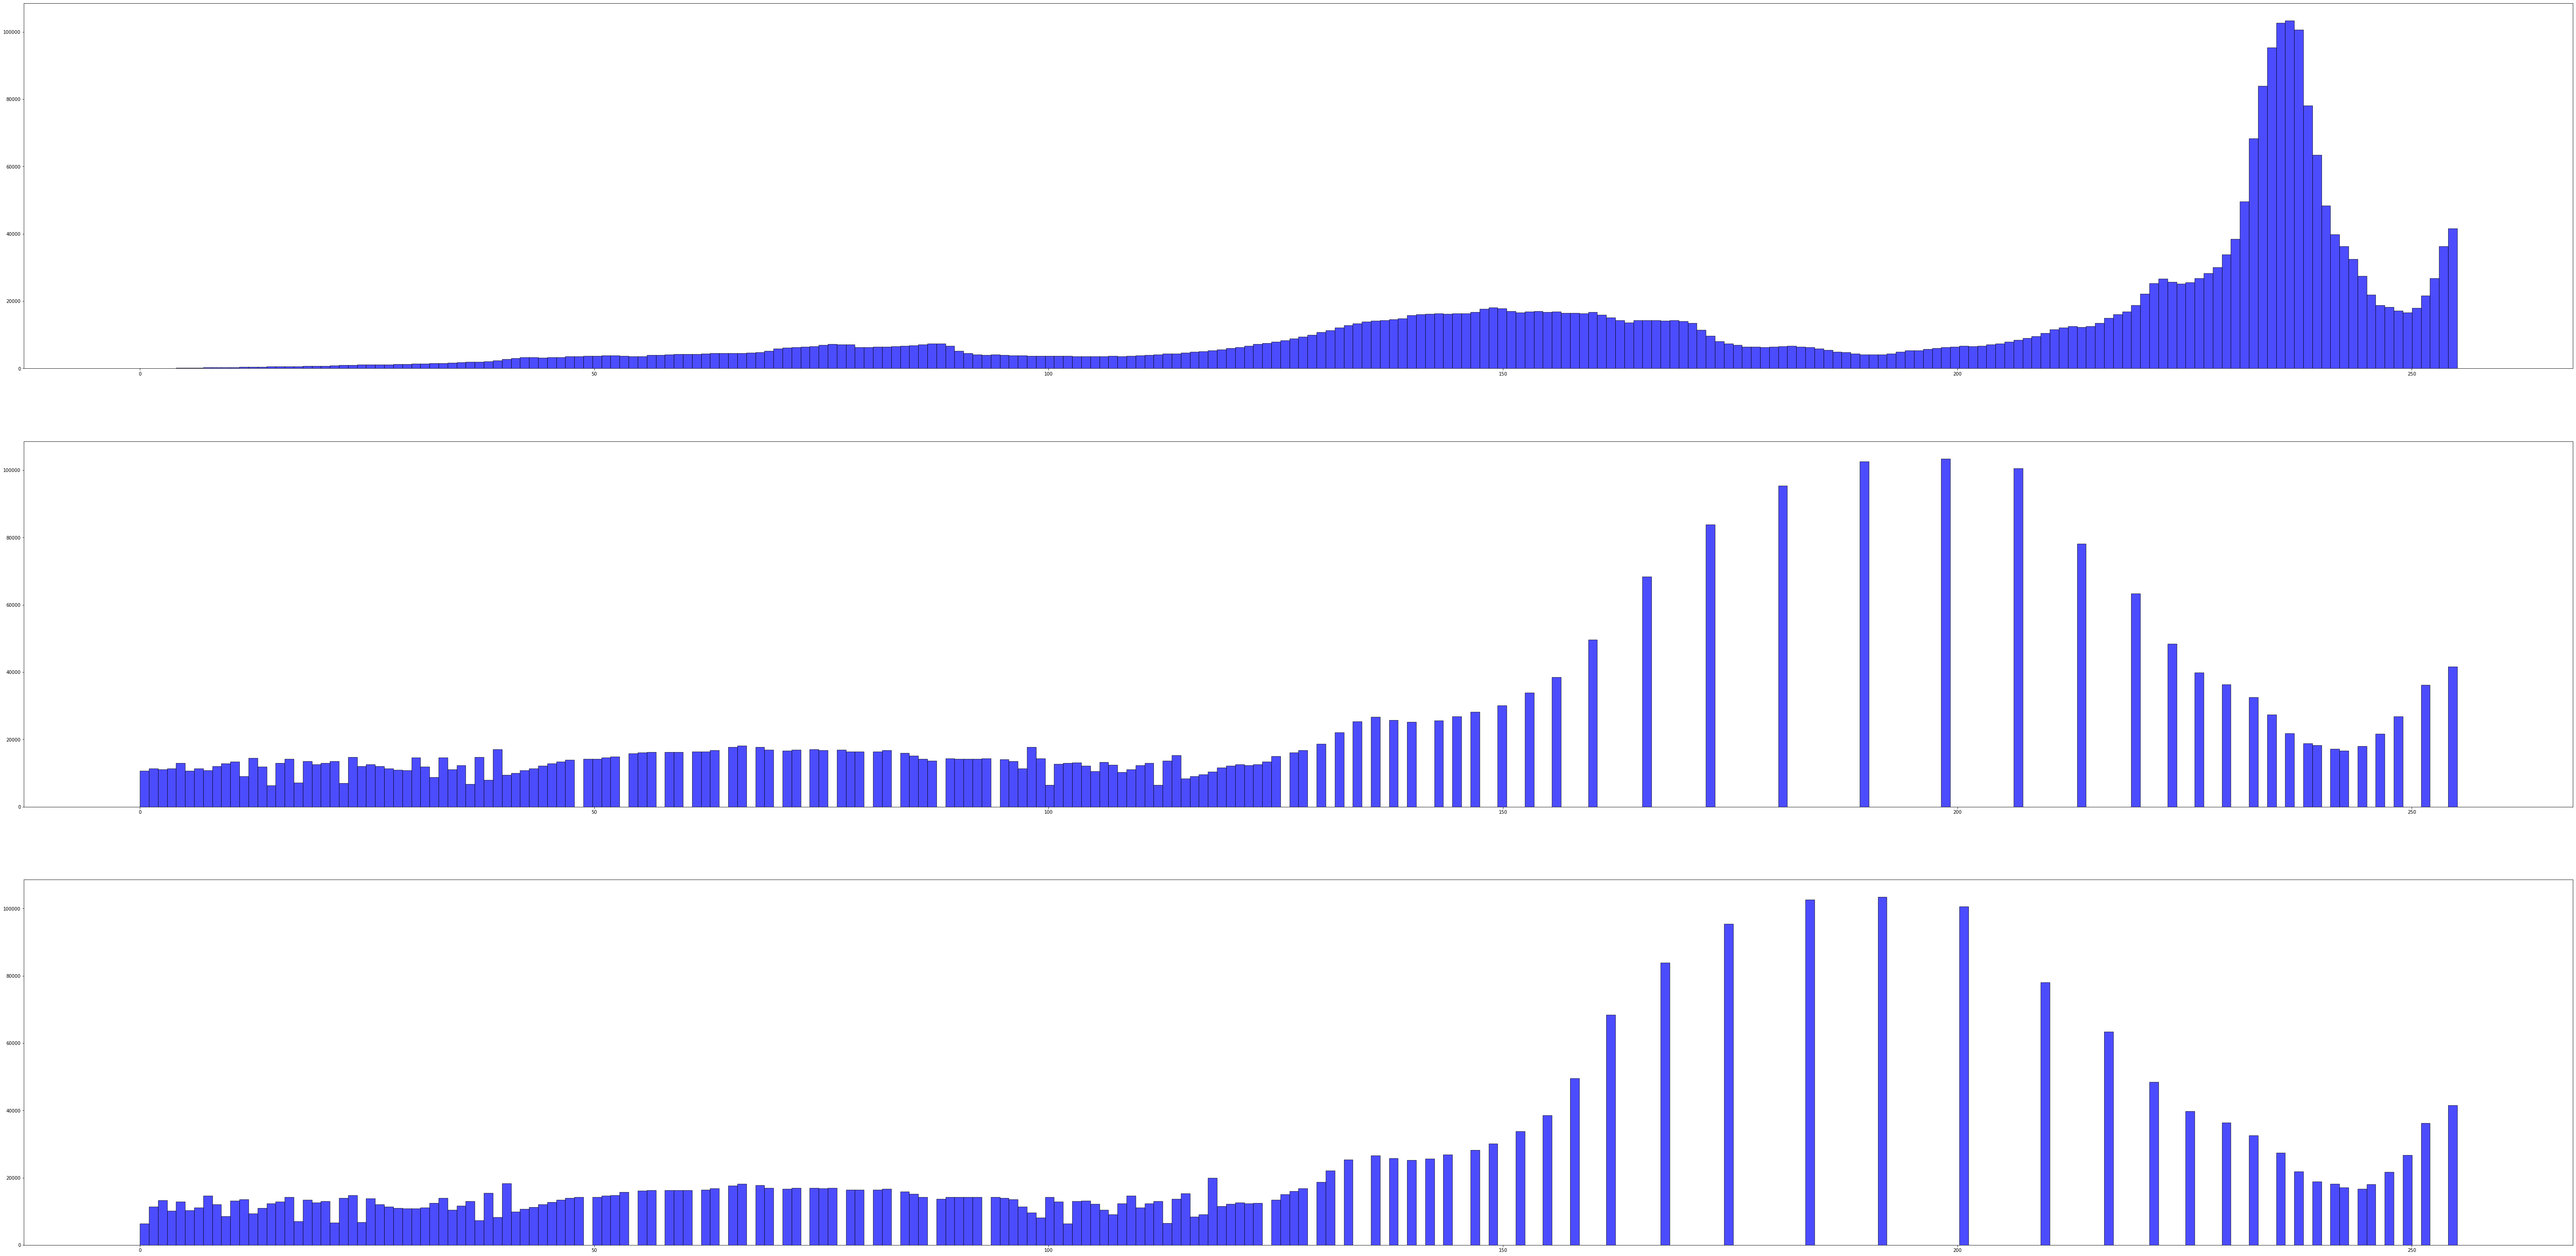

In [21]:
#show the histogram
ansmf=ans_m.flatten()
img1f=np.array(img_1).flatten()
plt.figure(figsize = (100,50))
plt.subplot(311)
plt.hist(mf, bins=256, facecolor="blue", edgecolor="black", alpha=0.7)
plt.subplot(312)
plt.hist(ansmf, bins=256, facecolor="blue", edgecolor="black", alpha=0.7)
plt.subplot(313)
plt.hist(img1f, bins=256, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

In [23]:
#calculate PSNR
psnr0=calPSNR(mf,ansmf)
psnr1=calPSNR(mf,img1f)

In [25]:
print(psnr0)
print(psnr1)

26.90338873568328
26.65134801811783
